In [8]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.utils import plot_model 

In [9]:
# Load the iris dataset 
iris = load_iris() 
X = iris.data 
y = iris.target 

In [10]:
# Scale the features 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 

In [11]:
# Encode the labels 
encoder = OneHotEncoder(sparse_output=False) 
y_encoded = encoder.fit_transform(y.reshape(-1, 1)) 
 
# Split the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, 
random_state=42) 

print(X_train.shape[1])
print(y_encoded.shape[1])
 
# Define the model 
model = Sequential([ 
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)), 
    Dense(64, activation='relu'), 
    Dense(y_encoded.shape[1], activation='softmax') 
]) 
 
# Compile the model 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
 
# Train the model 
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2) 

4
3
Epoch 1/100


c:\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.6330 - loss: 1.0036 - val_accuracy: 0.8571 - val_loss: 0.8754
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7968 - loss: 0.8249 - val_accuracy: 0.8571 - val_loss: 0.7529
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7710 - loss: 0.7239 - val_accuracy: 0.8571 - val_loss: 0.6618
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.8458 - loss: 0.6191 - val_accuracy: 0.8571 - val_loss: 0.5965
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8034 - loss: 0.5743 - val_accuracy: 0.8571 - val_loss: 0.5473
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.8240 - loss: 0.5209 - val_accuracy: 0.8571 - val_loss: 0.5116
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8202 - loss: 0.4597 - val_accuracy: 0.8571 - val_loss: 0.4800
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8128 - loss: 0.4462 - val_accuracy: 0.8571 - val_loss: 0.4539
Epo

Test Accuracy: 100.00%


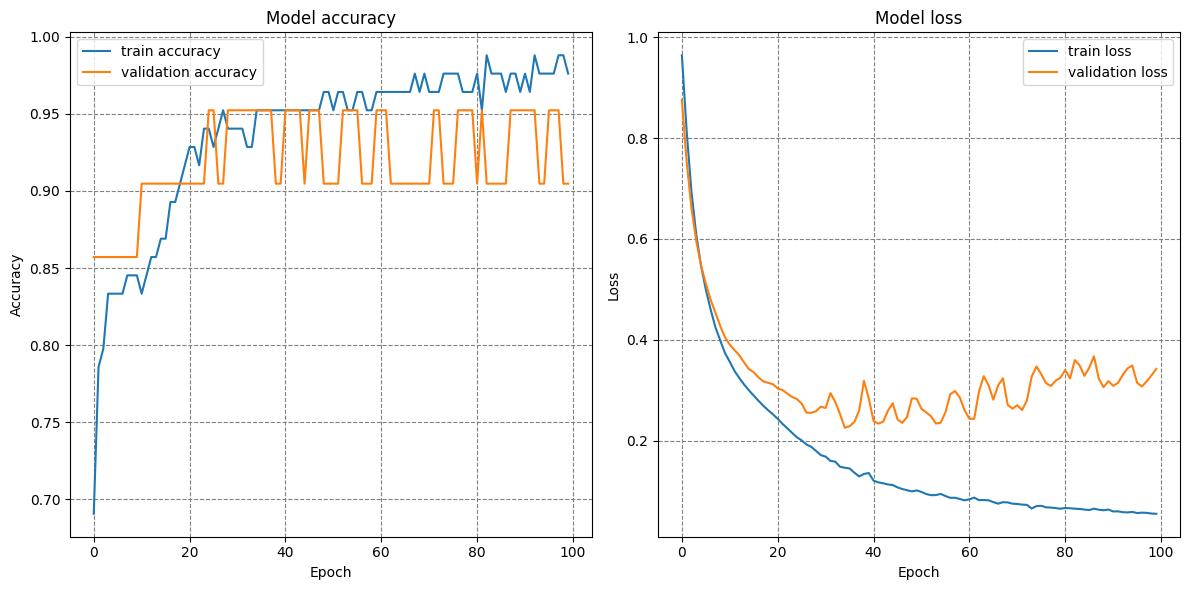

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [12]:
# Evaluate the model on the test set 
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0) 
print(f"Test Accuracy: {test_accuracy*100:.2f}%") 
 
# Plot the learning curve 
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1) 
plt.plot(history.history['accuracy'], label='train accuracy') 
plt.plot(history.history['val_accuracy'], label='validation accuracy') 
plt.title('Model accuracy') 
plt.ylabel('Accuracy') 
plt.xlabel('Epoch') 
plt.grid(True, linestyle='--', color='grey') 
plt.legend() 
 
plt.subplot(1, 2, 2) 
plt.plot(history.history['loss'], label='train loss') 
plt.plot(history.history['val_loss'], label='validation loss') 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.grid(True, linestyle='--', color='grey') 
plt.legend() 
 
plt.tight_layout() 
plt.show() 
 
# Save the model 
model.save('iris_model.h5') 
 
# Plot and save the model architecture 
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True) 

In [13]:
# a) Co robi StandardScaler? Jak transformowane są dane liczbowe? 
# StandardScaler skaluje dane aby miały średnią 0 i odchylenie standardowe 1 

# b) Czym jest OneHotEncoder (i kodowanie „one hot” ogólnie)? Jak etykiety klas są transformowane przez ten encoder? 
# przekształca kategorie do postaci macierzy binarnej. Każda klasa jest reprezentowana przez wektor, w którym tylko jeden element to 1, a reszta to 0.

# c) Model ma 4 warstwy: wejściową, dwie ukryte warstwy z 64 neuronami każda i warstwę wyjściową. 
# Ile neuronów ma warstwa wejściowa i co oznacza X_train.shape[1]? 
# Ile neuronów ma warstwa wyjściowa i co oznacza y_encoded.shape[1]? 
# Liczba neuronów w warstwie wejściowej = liczba cech (atrybutów) w zbiorze danych = X_train.shape[1], czyli 4 dla zbioru Iris.
# Liczba neuronów w warstwie wyjściowej = liczba klas = y_encoded.shape[1], czyli 3 (bo Iris ma 3 klasy).

# d) Czy funkcja aktywacji relu jest najlepsza do tego zadania? Spróbuj użyć innej funkcji i obejrzyj wyniki 
# ReLU (Rectified Linear Unit) 
# accuracy: 0.9665 - loss: 0.0735 - val_accuracy: 0.9524 - val_loss: 0.2894
# activation='tanh'
# accuracy: 0.9803 - loss: 0.0723 - val_accuracy: 1.0000 - val_loss: 0.0721
# activation='sigmoid'
# accuracy: 0.9312 - loss: 0.2256 - val_accuracy: 0.8095 - val_loss: 0.3536

# e) Model jest konfigurowany do treningu za pomocą polecenia compile. Tutaj wybieramy optymalizator (algorytm, 
# który używa gradientu straty do aktualizacji wag), funkcję straty, metrykę do oceny modelu. Eksperymentuj ze 
# zmianą tych parametrów na inne i uruchom program. Czy różne optymalizatory lub funkcje straty dają różne 
# wyniki? Czy możemy dostosować szybkość uczenia się w optymalizatorze?  
# SGD (wolniejszy, ale czasami skuteczniejszy dla małych zbiorów)
# Adam (adaptive moment estimation) (dobry wybór domyślny)
# RMSprop (często używany w sieciach CNN)

# f) W linii model.fit sieć neuronowa jest trenowana. Czy jest sposób, by zmodyfikować tę linię tak, aby rozmiar 
# partii był równy 4 lub 8 lub 16? Jak wyglądają krzywe uczenia się dla różnych parametrów? Jak zmiana partii 
# wpływa na kształt krzywych? Wypróbuj różne wartości i uruchom program.  
#  batch_size=4
# szybciej się uczy
#  batch_size=16
# model wolniej się uczy

# g) Co możesz powiedzieć o wydajności sieci neuronowej na podstawie krzywych uczenia? W której epoce sieć 
# osiągnęła najlepszą wydajność? Czy ta krzywa sugeruje dobrze dopasowany model, czy mamy do czynienia z 
# niedouczeniem lub przeuczeniem? 


# h) Przejrzyj niżej wymieniony kod i wyjaśnij co się w nim dzieje